# Anti-spoofing enabled hyperspectral face recognition 

In [2]:
import os, glob
import numpy as np

# path = "F:\\gist-grad\\research\\projects\\hsi-face-recog\\20240724-demo-spectra"
path = "C:\\Users\\youngin\\Desktop\\2025_project\\python\\dataset-spectra"


data = {}
for file in glob.glob("**/*.SSM", root_dir=path):
    file_name = file.split("\\")[0]

    with open(os.path.join(path, file), "r") as f:
        lines = f.readlines()

    data__ = np.array([float(line.split()[-1]) for line in lines[2:]]).reshape(1, -1)
    data_ = data.get(file_name, np.empty([0, data__.shape[-1]]))
    data[file_name] = np.append(data_, data__ / data__.max(), axis=0)

In [3]:
import matplotlib.pyplot as plt


def build_axes(ax_size, rows, cols):
    fig, axes = plt.subplots(
        rows, cols, figsize=(ax_size[0] * cols, ax_size[1] * rows), constrained_layout=True, squeeze=False
    )

    for ax in axes.flatten():
        ax.tick_params(axis="both", which="major", width=2, labelsize=15)
        for sp in ax.spines.values():
            sp.set_linewidth(2)

        for tick in ax.get_xticklabels() + ax.get_yticklabels():
            tick.set_fontweight("bold")

    return fig, axes


def draw_axes(ax_size, rows, cols):
    fig, axes = build_axes(ax_size, rows, cols)

    for ax in axes.flatten():
        ax.set_xlim([400, 750])
        ax.set_ylim([-0.05, 1.1])

        ax.set_yticks([0, 0.5, 1.0])
        ax.set_yticklabels([0, 0.5, 1.0])

        ax.set_xlabel("Wavelength (nm)", fontsize=20, fontweight="bold")
        ax.set_ylabel("Normalized Intensity (A.U.)", fontsize=15, fontweight="bold")

    return fig, axes

KeyError: 'skin'

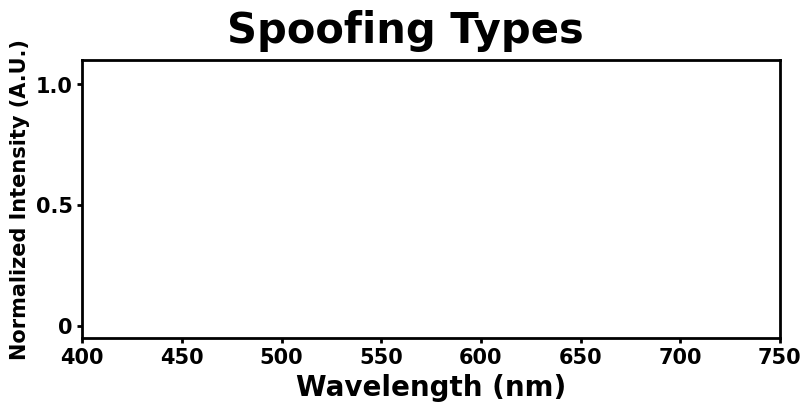

In [4]:
fig, axes = draw_axes((8, 4), 1, 1)
axes = axes.flatten()
fig.suptitle("Spoofing Types", fontsize=30, fontweight="bold")

type_names = ["skin", "print", "iphone", "ipad"]
type_colors = ["orange", "red", "blue", "green"]


idx = 0
ax = axes[idx]
spectra_spoof = {}
for i in range(len(type_names)):
    x = data[type_names[i]]

    x_min = x.min(axis=0)
    x_max = x.max(axis=0)
    x_avg = x.mean(axis=0)

    spectra_spoof[type_names[i]] = x_avg

    ax.plot(range(184, 849), x_avg, type_colors[i], label=type_names[i])
    ax.fill_between(range(184, 849), x_max, x_min, color=type_colors[i], alpha=0.1)

ax.legend()

# Modality Analysis

In [2]:
import os, glob
import numpy as np

import scipy.io as io

# path_base = "F:/gist-grad/research/projects/hsi-face-recog/20240724-demo"
path_base = "C:/Users/youngin/Desktop/2025_project/python/dataset"


data = {}
for subject_name in glob.glob("*/", root_dir=path_base):
    subject_name = subject_name.split("\\")[0]
    print(subject_name, end=" ")

    data_ = {}
    for type_name in glob.glob("*/", root_dir=os.path.join(path_base, subject_name)):
        type_name = type_name.split("\\")[0]

        print(type_name, end=" ")

        data__ = {
            "cube_meas": io.loadmat(os.path.join(path_base, subject_name, type_name, "cube_meas.mat"))["cube_meas"],
            "cube_xr": io.loadmat(os.path.join(path_base, subject_name, type_name, "cube_xr.mat"))["cube_xr"],
        }

        data_[type_name] = data__

    print()
    data[subject_name] = data_

01-yi_choi 01-live 02-paper 03-iphone 


In [3]:
import matplotlib.pyplot as plt


def build_axes(ax_size, rows, cols):
    fig, axes = plt.subplots(
        rows,
        cols,
        figsize=(ax_size[0] * cols, ax_size[1] * rows),
        constrained_layout=True,
        squeeze=False,
        width_ratios=[1, 2],
    )

    for ax in axes[:, -1]:
        ax.tick_params(axis="both", which="major", width=2, labelsize=15)
        for sp in ax.spines.values():
            sp.set_linewidth(2)

        for tick in ax.get_xticklabels() + ax.get_yticklabels():
            tick.set_fontweight("bold")

    return fig, axes


def colorize(cube, bands):
    H, W, _ = cube.shape

    img = np.zeros([H, W, 3])
    bands = bands[:3]
    for ch, band in enumerate(bands):
        img_ = cube[:, :, band]
        img_ = (img_ - img_.min()) / (img_.max() - img_.min())
        img[:, :, ch] = img_

    return img

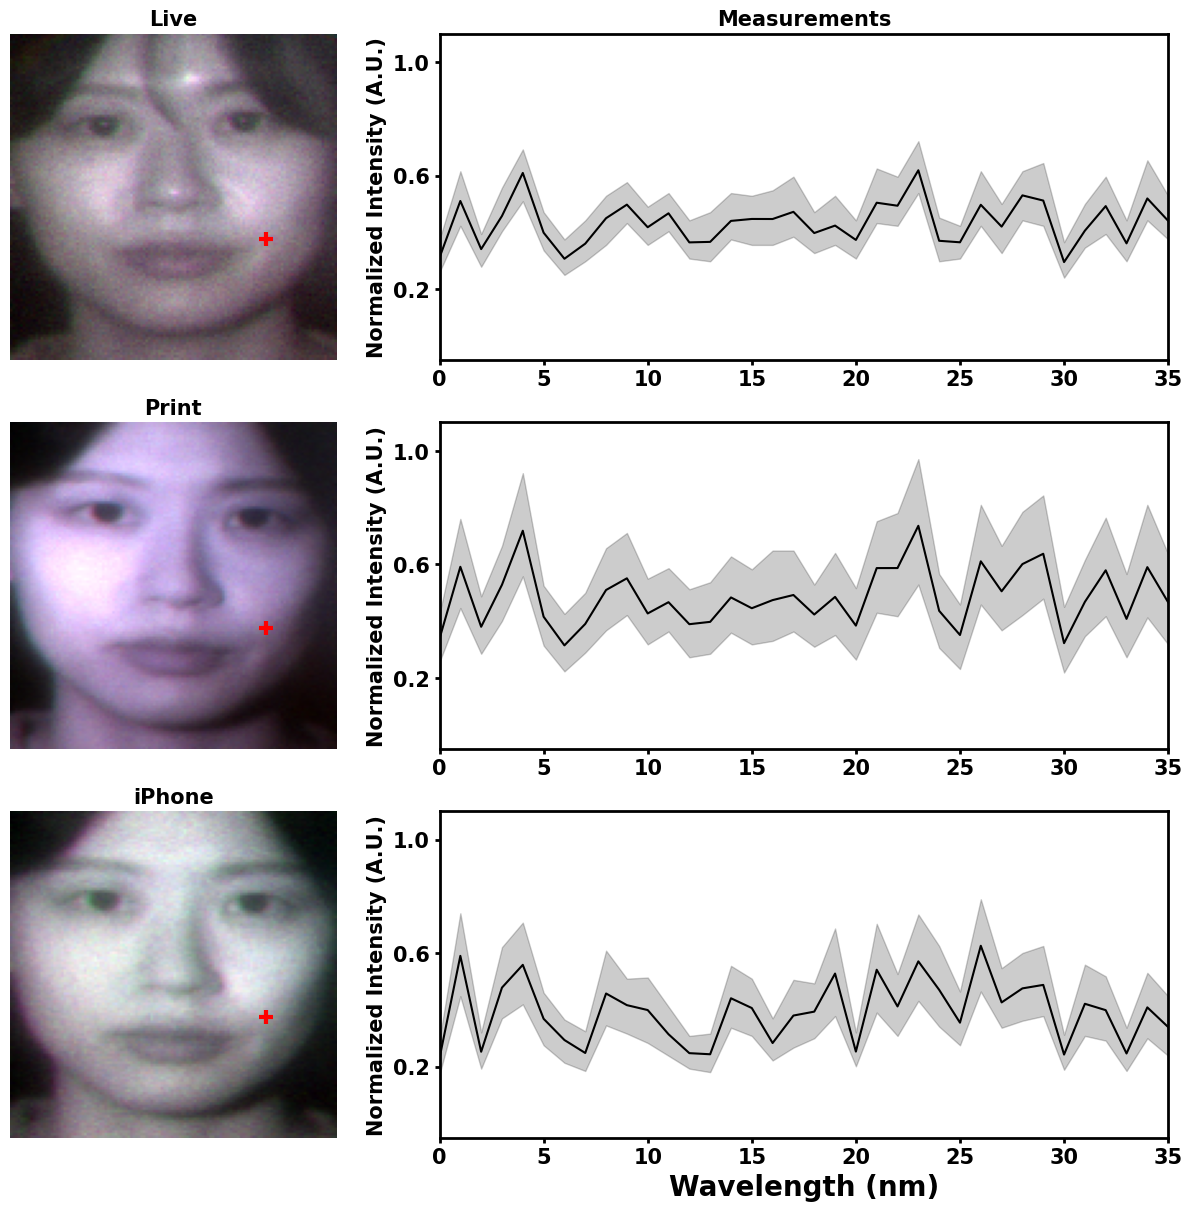

In [8]:
def draw_axes(ax_size):
    # fig, axes = build_axes(ax_size, 4, 2)
    fig, axes = build_axes(ax_size, 3, 2)

    for ax in axes[:, -1]:
        ax.set_xlim([0, 35])
        ax.set_ylim([-0.05, 1.1])

        ax.set_yticks([0.2, 0.6, 1.0])
        ax.set_yticklabels([0.2, 0.6, 1.0])

        ax.set_ylabel("Normalized Intensity (A.U.)", fontsize=15, fontweight="bold")

    axes[-1, -1].set_xlabel("Wavelength (nm)", fontsize=20, fontweight="bold")

    for ax in axes[:, 0]:
        ax.axis("off")

    return fig, axes


fig, axes = draw_axes((6, 4))
bands = [3, 2, 1]

pt = (100, 80)
d = 5

# live
# cube_ = data["01-j_lee"]["01-live"]["cube_meas"]
cube_ = data["01-yi_choi"]["01-live"]["cube_meas"]
rgb_ = colorize(cube_, bands)

ax = axes[0, 0]
ax.imshow(rgb_, cmap="grey")
ax.scatter(*pt, color="red", marker="+", label="origin", s=100, linewidths=3)
ax.set_title("Live", fontsize=15, fontweight="bold")

y_ = cube_[pt[1] - d : pt[1] + d, pt[0] - d : pt[0] + d, :].reshape(-1, 36)
y_min = y_.min(axis=0)
y_max = y_.max(axis=0)
y_avg = y_.mean(axis=0)

ax = axes[0, 1]
ax.fill_between(list(range(len(y_min))), y_max, y_min, alpha=0.2, color="black")
ax.plot(list(range(len(y_min))), y_avg, color="black")
ax.set_title("Measurements", fontsize=15, fontweight="bold")


# print
# cube_ = data["01-j_lee"]["02-print"]["cube_meas"]
cube_ = data["01-yi_choi"]["02-paper"]["cube_meas"]
rgb_ = colorize(cube_, bands)

ax = axes[1, 0]
ax.imshow(rgb_, cmap="grey")
ax.scatter(*pt, color="red", marker="+", label="origin", s=100, linewidths=3)
ax.set_title("Print", fontsize=15, fontweight="bold")

y_ = cube_[pt[1] - d : pt[1] + d, pt[0] - d : pt[0] + d, :].reshape(-1, 36)
y_min = y_.min(axis=0)
y_max = y_.max(axis=0)
y_avg = y_.mean(axis=0)

ax = axes[1, 1]
ax.fill_between(list(range(len(y_min))), y_max, y_min, alpha=0.2, color="black")
ax.plot(list(range(len(y_min))), y_avg, color="black")

# ipad
# cube_ = data["01-j_lee"]["03-ipad"]["cube_meas"]
cube_ = data["01-yi_choi"]["03-iphone"]["cube_meas"]
rgb_ = colorize(cube_, bands)

ax = axes[2, 0]
ax.imshow(rgb_, cmap="grey")
ax.scatter(*pt, color="red", marker="+", label="origin", s=100, linewidths=3)
ax.set_title("iPhone", fontsize=15, fontweight="bold")

y_ = cube_[pt[1] - d : pt[1] + d, pt[0] - d : pt[0] + d, :].reshape(-1, 36)
y_min = y_.min(axis=0)
y_max = y_.max(axis=0)
y_avg = y_.mean(axis=0)

ax = axes[2, 1]
ax.fill_between(list(range(len(y_min))), y_max, y_min, alpha=0.2, color="black")
ax.plot(list(range(len(y_min))), y_avg, color="black")

# # iphone
# cube_ = data["01-j_lee"]["04-iphone"]["cube_meas"]
# rgb_ = colorize(cube_, bands)

# ax = axes[3, 0]
# ax.imshow(rgb_, cmap="grey")
# ax.scatter(*pt, color="red", marker="+", label="origin", s=100, linewidths=3)
# ax.set_title("iPhone", fontsize=15, fontweight="bold")

# y_ = cube_[pt[1] - d : pt[1] + d, pt[0] - d : pt[0] + d, :].reshape(-1, 36)
# y_min = y_.min(axis=0)
# y_max = y_.max(axis=0)
# y_avg = y_.mean(axis=0)

# ax = axes[3, 1]
# ax.fill_between(list(range(len(y_min))), y_max, y_min, alpha=0.2, color="black")
# ax.plot(list(range(len(y_min))), y_avg, color="black")

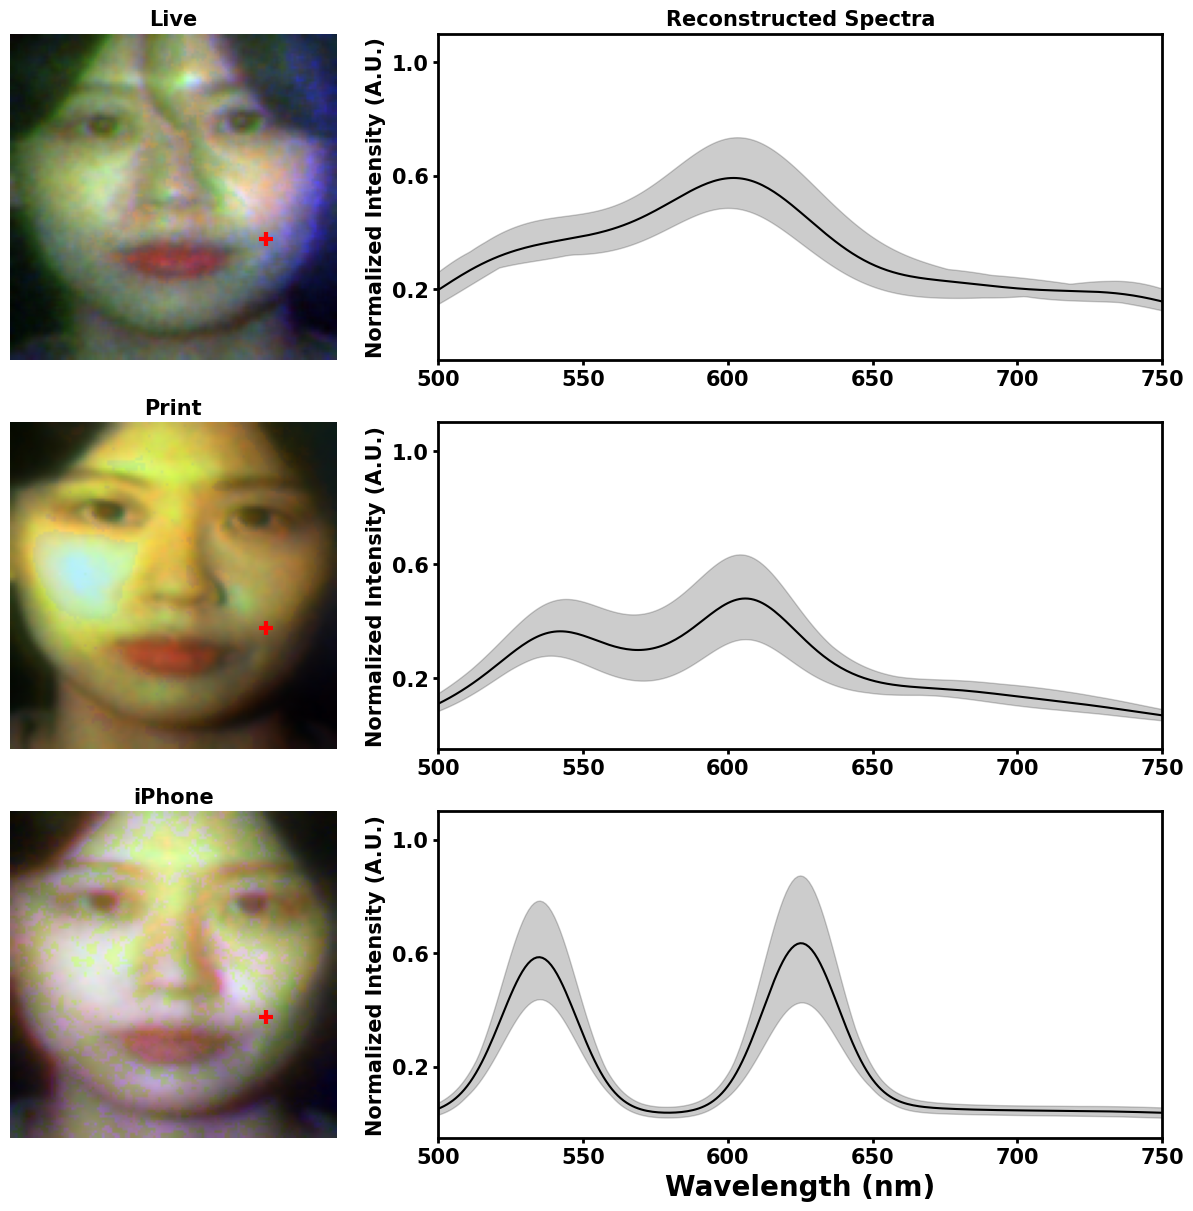

In [7]:
def draw_axes(ax_size):
    # fig, axes = build_axes(ax_size, 4, 2)
    fig, axes = build_axes(ax_size, 3, 2)

    for ax in axes[:, -1]:
        ax.set_xlim([500, 750])
        ax.set_ylim([-0.05, 1.1])

        ax.set_yticks([0.2, 0.6, 1.0])
        ax.set_yticklabels([0.2, 0.6, 1.0])

        ax.set_ylabel("Normalized Intensity (A.U.)", fontsize=15, fontweight="bold")

    axes[-1, -1].set_xlabel("Wavelength (nm)", fontsize=20, fontweight="bold")

    for ax in axes[:, 0]:
        ax.axis("off")

    return fig, axes


fig, axes = draw_axes((6, 4))
bands = [150, 50, 0]

# live
# cube_ = data["01-j_lee"]["01-live"]["cube_xr"]
cube_ = data["01-yi_choi"]["01-live"]["cube_xr"]
rgb_ = colorize(cube_, bands)

ax = axes[0, 0]
ax.imshow(rgb_, cmap="grey")
ax.scatter(*pt, color="red", marker="+", label="origin", s=100, linewidths=3)
ax.set_title("Live", fontsize=15, fontweight="bold")

y_ = cube_[pt[1] - d : pt[1] + d, pt[0] - d : pt[0] + d, :].reshape(-1, 350)
y_min = y_.min(axis=0)
y_max = y_.max(axis=0)
y_avg = y_.mean(axis=0)

ax = axes[0, 1]
ax.fill_between(range(500, 850), y_max, y_min, alpha=0.2, color="black")
ax.plot(range(500, 850), y_avg, color="black")
ax.set_title("Reconstructed Spectra", fontsize=15, fontweight="bold")


# print
# cube_ = data["01-j_lee"]["02-print"]["cube_xr"]
cube_ = data["01-yi_choi"]["02-paper"]["cube_xr"]
rgb_ = colorize(cube_, bands)

ax = axes[1, 0]
ax.imshow(rgb_, cmap="grey")
ax.scatter(*pt, color="red", marker="+", label="origin", s=100, linewidths=3)
ax.set_title("Print", fontsize=15, fontweight="bold")

y_ = cube_[pt[1] - d : pt[1] + d, pt[0] - d : pt[0] + d, :].reshape(-1, 350)
y_min = y_.min(axis=0)
y_max = y_.max(axis=0)
y_avg = y_.mean(axis=0)

ax = axes[1, 1]
ax.fill_between(range(500, 850), y_max, y_min, alpha=0.2, color="black")
ax.plot(range(500, 850), y_avg, color="black")

# ipad
# cube_ = data["01-j_lee"]["03-ipad"]["cube_xr"]
cube_ = data["01-yi_choi"]["03-iphone"]["cube_xr"]
rgb_ = colorize(cube_, bands)

ax = axes[2, 0]
ax.imshow(rgb_, cmap="grey")
ax.scatter(*pt, color="red", marker="+", label="origin", s=100, linewidths=3)
ax.set_title("iPhone", fontsize=15, fontweight="bold")

y_ = cube_[pt[1] - d : pt[1] + d, pt[0] - d : pt[0] + d, :].reshape(-1, 350)
y_min = y_.min(axis=0)
y_max = y_.max(axis=0)
y_avg = y_.mean(axis=0)

ax = axes[2, 1]
ax.fill_between(range(500, 850), y_max, y_min, alpha=0.2, color="black")
ax.plot(range(500, 850), y_avg, color="black")

# # iphone
# cube_ = data["01-j_lee"]["04-iphone"]["cube_xr"]
# rgb_ = colorize(cube_, bands)

# ax = axes[3, 0]
# ax.imshow(rgb_, cmap="grey")
# ax.scatter(*pt, color="red", marker="+", label="origin", s=100, linewidths=3)
# ax.set_title("iPhone", fontsize=15, fontweight="bold")

# y_ = cube_[pt[1] - d : pt[1] + d, pt[0] - d : pt[0] + d, :].reshape(-1, 350)
# y_min = y_.min(axis=0)
# y_max = y_.max(axis=0)
# y_avg = y_.mean(axis=0)

# ax = axes[3, 1]
# ax.fill_between(range(500, 850), y_max, y_min, alpha=0.2, color="black")
# ax.plot(range(500, 850), y_avg, color="black")